In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

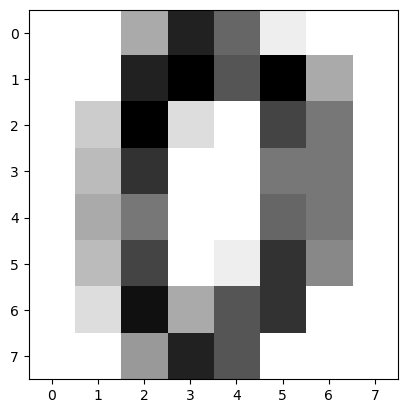

In [11]:
# MNIST 손글씨 숫자 데이터셋 로드
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

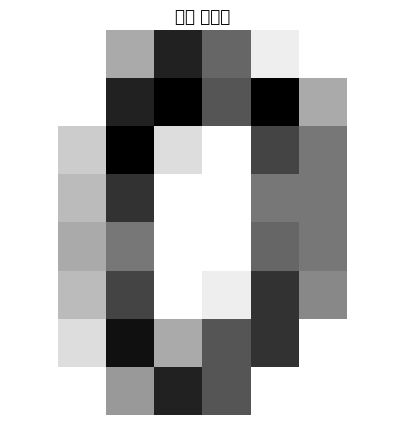

In [13]:
# 첫 번째 샘플 이미지 시각화
plt.figure(figsize=(5, 5))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('샘플 이미지')
plt.axis('off')
plt.show()

In [15]:
# 데이터 전처리
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [17]:
# 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# PyTorch 텐서로 변환
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

In [23]:
# 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [27]:
# 모델 정의 (다중 분류)
class DigitsMultiClassDNN(nn.Module):
    def __init__(self):
        super(DigitsMultiClassDNN, self).__init__()
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)  # 10 클래스 분류
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # CrossEntropyLoss는 softmax 없이 logits 입력 받음
        return x

In [31]:
# 모델, 손실함수, 옵티마이저 정의
model = DigitsMultiClassDNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
train_losses = []
test_accuracies = []
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # 테스트 정확도 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

NameError: name 'train_dataloader' is not defined